# DATASET REGRESION LINEAL - Vehicle  dataset

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
# Cargar el dataset
df = pd.read_csv('C:/Users/Luisj/Videos/archive/car data.csv')

# 1.Análisis Exploratorio (EDA)

In [ ]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
display(df.head())

Primeras filas del dataset:


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Primeras filas del dataset:


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB

Valores nulos en el dataset:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Descripción estadística del dataset:


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


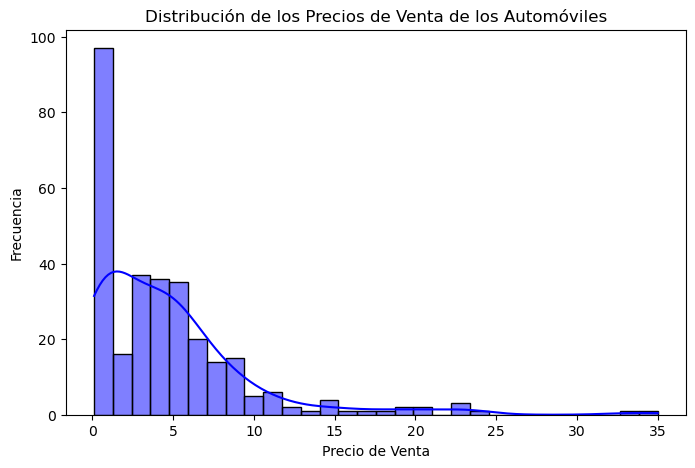

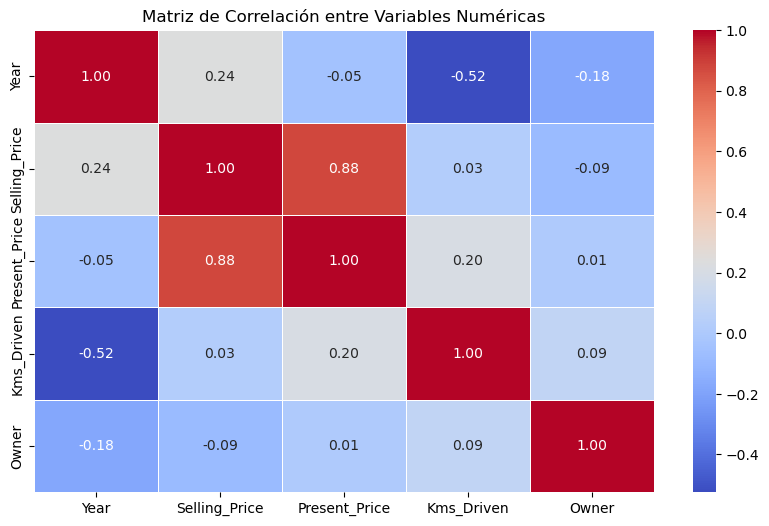

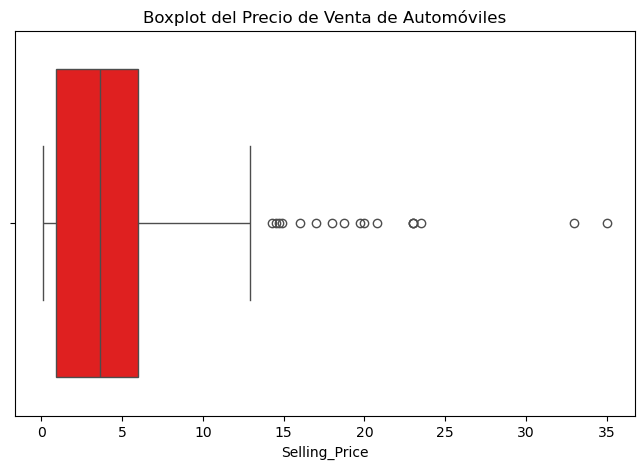

In [95]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
display(df.head())
# Información general del dataset
print("\nInformación del dataset:")
df.info()
# Revisar valores nulos
print("\nValores nulos en el dataset:")
print(df.isnull().sum())

# Descripción estadística de los datos numéricos
print("\nDescripción estadística del dataset:")
display(df.describe())

# Visualización de la distribución de precios de los automóviles
plt.figure(figsize=(8, 5))
sns.histplot(df["Selling_Price"], bins=30, kde=True, color="blue")
plt.title("Distribución de los Precios de Venta de los Automóviles")
plt.xlabel("Precio de Venta")
plt.ylabel("Frecuencia")
plt.show()

# Matriz de correlación (solo con variables numéricas)
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

# Boxplot para identificar valores atípicos en el precio de venta
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Selling_Price"], color="red")
plt.title("Boxplot del Precio de Venta de Automóviles")
plt.show()


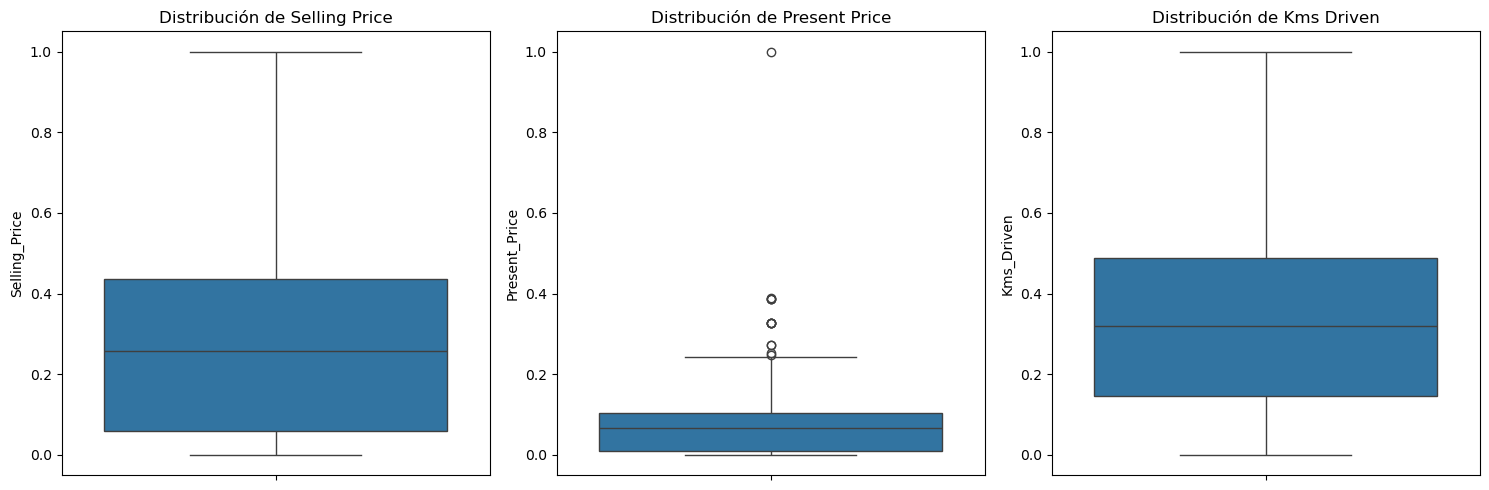

In [175]:
#Análisis de valores atípicos#
# Gráficos de caja para detectar valores atípicos
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(y=df["Selling_Price"], ax=axes[0])
axes[0].set_title("Distribución de Selling Price")

sns.boxplot(y=df["Present_Price"], ax=axes[1])
axes[1].set_title("Distribución de Present Price")

sns.boxplot(y=df["Kms_Driven"], ax=axes[2])
axes[2].set_title("Distribución de Kms Driven")
plt.tight_layout()
plt.show()

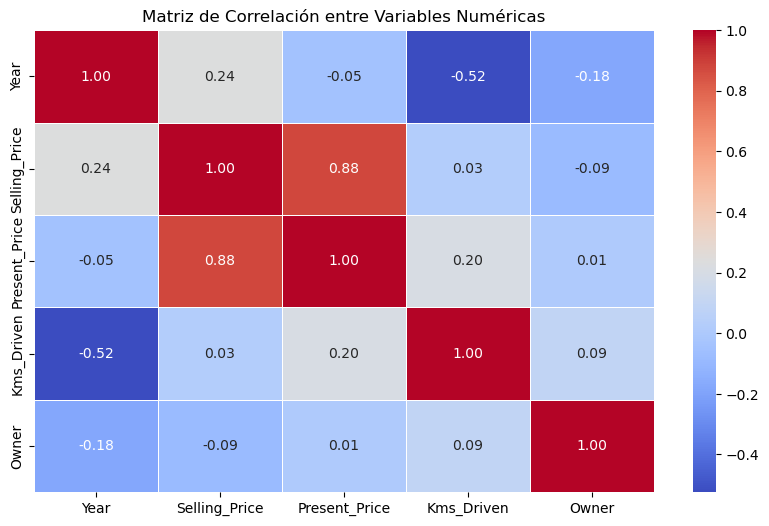

In [53]:
#Análisis de correlación entre variables numéricas
# Matriz de correlación (solo con variables numéricas)
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.  

In [ ]:
#Eliminación de columnas irrelevantes
#La columna Car_Name no aporta información útil para la predicción y puede eliminarse.
df.drop(columns=["Car_Name"], inplace=True)
    

In [103]:
#Codificación de variables categóricas
#Las variables categóricas (Fuel_Type, Seller_Type, Transmission) deben convertirse en valores numéricos para que el modelo pueda procesarlas.

from sklearn.preprocessing import LabelEncoder

# Codificación de variables categóricas
label_encoders = {}
categorical_cols = ["Fuel_Type", "Seller_Type", "Transmission"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Guardamos los codificadores para futuras referencias

In [105]:
#Detección y tratamiento de valores atípicos
#Los valores extremos en Selling_Price, Present_Price y Kms_Driven pueden afectar el rendimiento del modelo.
#Detección de valores atípicos con el rango intercuartil (IQR)

import numpy as np

def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]

outliers_km = detectar_outliers(df, "Kms_Driven")
outliers_price = detectar_outliers(df, "Selling_Price")

In [107]:
#Podemos eliminar estos valores extremos o transformarlos. Para este caso, vamos a reemplazar los valores atípicos con los límites del IQR.

def reemplazar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df[columna] = np.where(df[columna] < limite_inferior, limite_inferior, df[columna])
    df[columna] = np.where(df[columna] > limite_superior, limite_superior, df[columna])

# Aplicamos el reemplazo de outliers en las columnas clave
reemplazar_outliers(df, "Kms_Driven")
reemplazar_outliers(df, "Selling_Price")

In [109]:
#Escalado de datos
#Para mejorar el rendimiento del modelo, normalizamos las variables numéricas usando Min-Max Scaling.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_scale = ["Year", "Present_Price", "Selling_Price", "Kms_Driven", "Owner"]
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

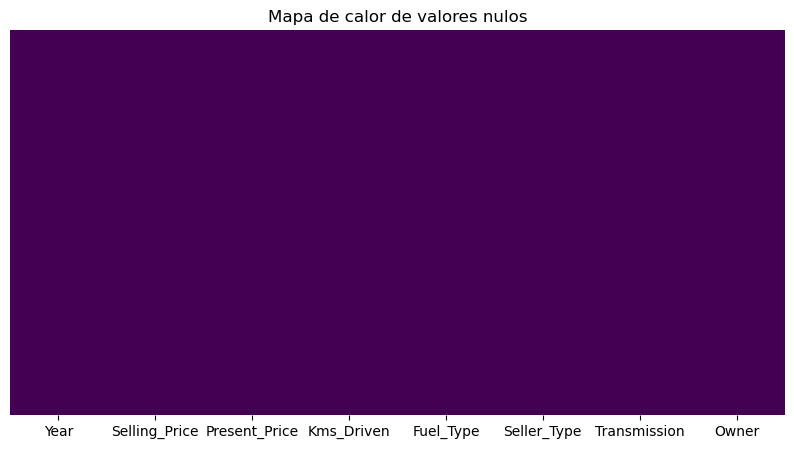

In [111]:
#Verificación de valores nulos
#Después del preprocesamiento, no deberíamos tener valores nulos.
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Mapa de calor de valores nulos")
plt.show()

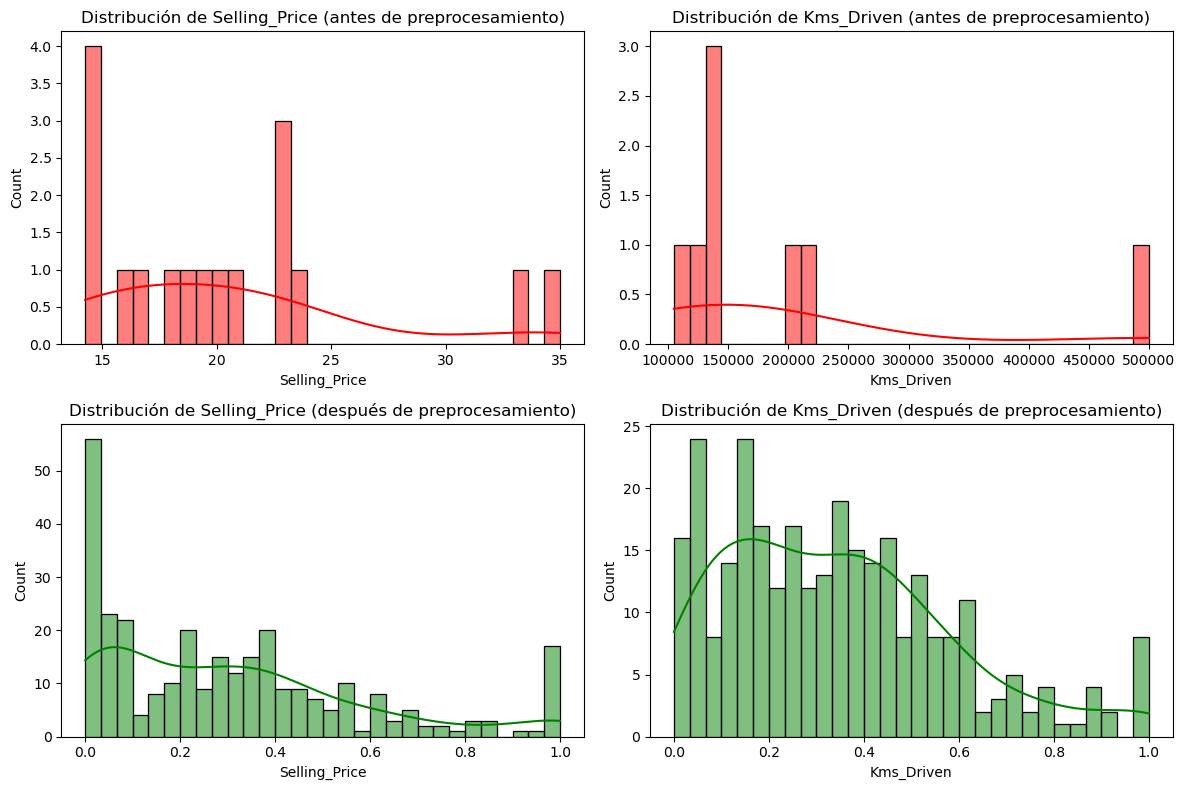

In [113]:
#Comparación de distribución antes y después del preprocesamiento
#Podemos comparar la distribución de algunas variables clave (como Selling_Price y Kms_Driven) antes y después de la eliminación de valores atípicos.

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Antes del preprocesamiento
sns.histplot(outliers_price["Selling_Price"], bins=30, kde=True, ax=axes[0, 0], color="red")
axes[0, 0].set_title("Distribución de Selling_Price (antes de preprocesamiento)")

sns.histplot(outliers_km["Kms_Driven"], bins=30, kde=True, ax=axes[0, 1], color="red")
axes[0, 1].set_title("Distribución de Kms_Driven (antes de preprocesamiento)")

# Después del preprocesamiento
sns.histplot(df["Selling_Price"], bins=30, kde=True, ax=axes[1, 0], color="green")
axes[1, 0].set_title("Distribución de Selling_Price (después de preprocesamiento)")

sns.histplot(df["Kms_Driven"], bins=30, kde=True, ax=axes[1, 1], color="green")
axes[1, 1].set_title("Distribución de Kms_Driven (después de preprocesamiento)")

plt.tight_layout()
plt.show()

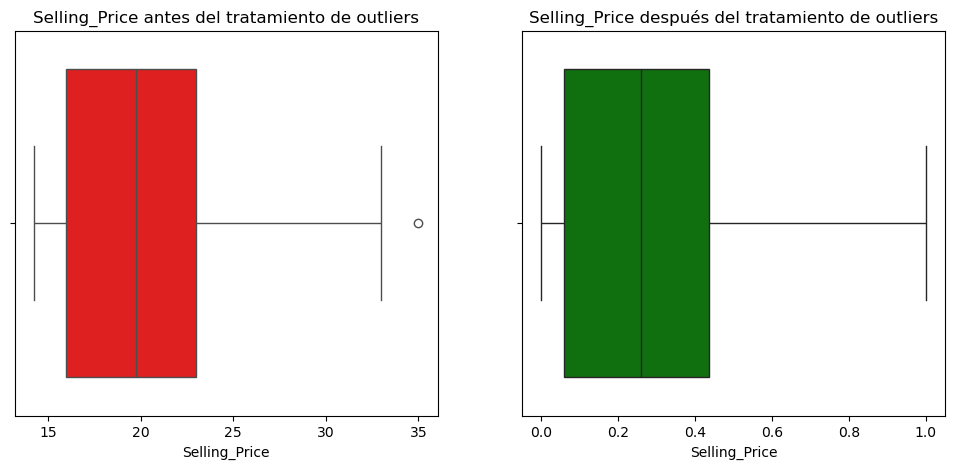

In [115]:
#Boxplots antes y después del tratamiento de outliers
#Los boxplots son excelentes para visualizar valores atípicos. Podemos comparar la variable Selling_Price antes y después del tratamiento de outliers.

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot antes del tratamiento de outliers
sns.boxplot(x=outliers_price["Selling_Price"], ax=axes[0], color="red")
axes[0].set_title("Selling_Price antes del tratamiento de outliers")

# Boxplot después del tratamiento de outliers
sns.boxplot(x=df["Selling_Price"], ax=axes[1], color="green")
axes[1].set_title("Selling_Price después del tratamiento de outliers")

plt.show()

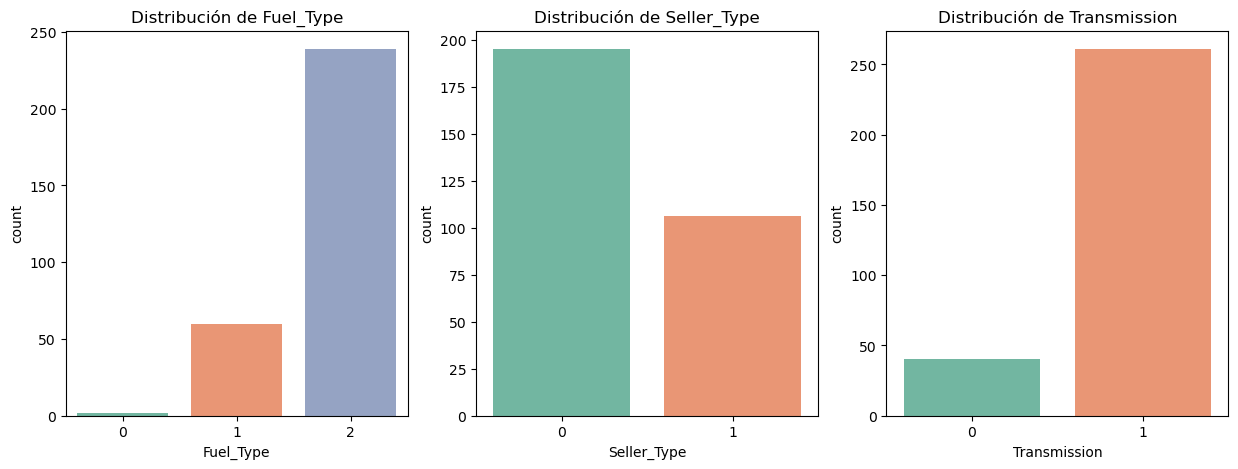

In [119]:
#Verificación de la codificación de variables categóricas
#Podemos hacer gráficos de barras para ver cómo quedaron las variables categóricas después de la codificación.

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Fuel_Type
sns.countplot(x=df["Fuel_Type"], hue=df["Fuel_Type"], ax=axes[0], palette="Set2", legend=False)
axes[0].set_title("Distribución de Fuel_Type")

# Seller_Type
sns.countplot(x=df["Seller_Type"], hue=df["Seller_Type"], ax=axes[1], palette="Set2", legend=False)
axes[1].set_title("Distribución de Seller_Type")

# Transmission
sns.countplot(x=df["Transmission"], hue=df["Transmission"], ax=axes[2], palette="Set2", legend=False)
axes[2].set_title("Distribución de Transmission")

plt.show()

# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

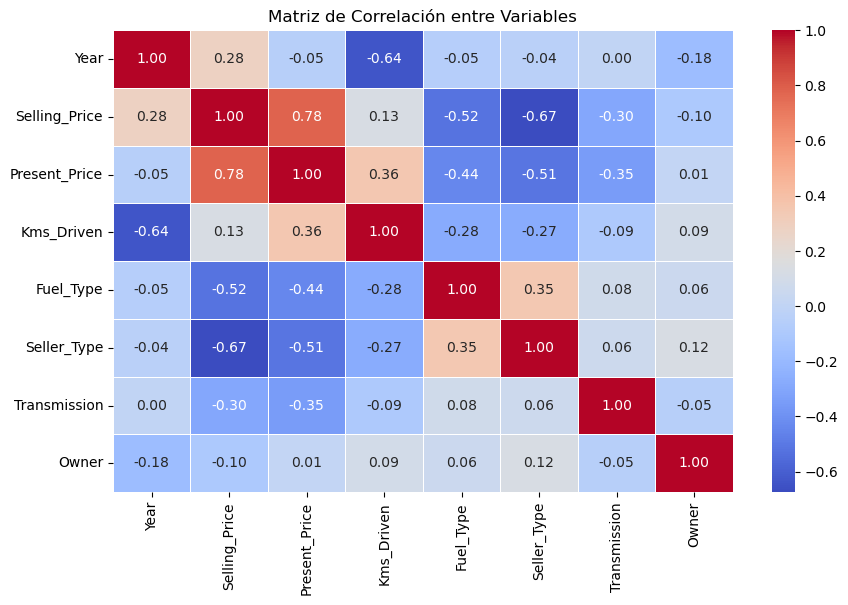

In [ ]:
##Análisis de correlación (Matriz de calor)##
#Las características altamente correlacionadas pueden aportar información redundante, así que primero analizamos la correlación entre variables numéricas.

# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()

#Valores cercanos a 1 o -1 indican una fuerte relación (positiva o negativa).
#Si dos variables están fuertemente correlacionadas, podríamos eliminar una.

In [127]:
print(df.columns)  # Verifica las columnas actuales

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


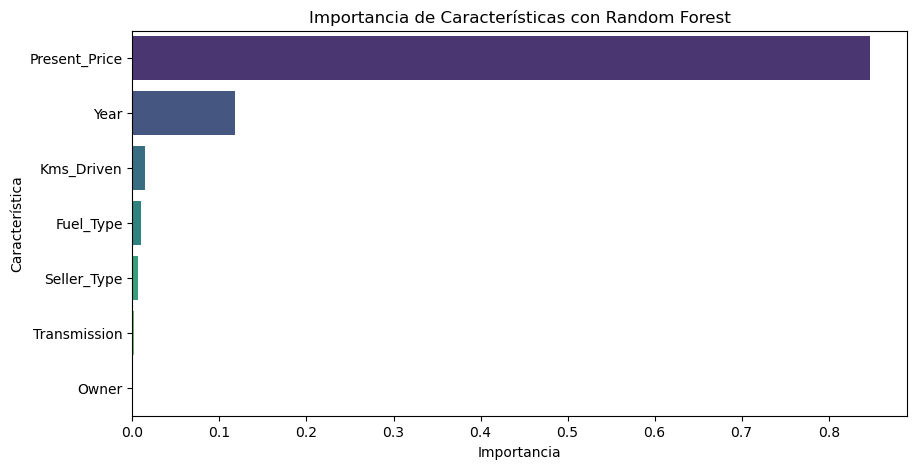

In [131]:
##Importancia de características con Random Forest##
#Random Forest asigna una puntuación de importancia a cada variable según su impacto en la predicción.

from sklearn.ensemble import RandomForestRegressor

# Definir variables predictoras y objetivo
X = df.drop(["Selling_Price"], axis=1)  # Eliminamos la variable objetivo y nombres de autos
y = df["Selling_Price"]

# Convertir variables categóricas a numéricas (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# Modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Obtener importancia de características
importances = model.feature_importances_
feature_names = X.columns

# Visualizar importancias
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, hue="Feature", dodge=False, palette="viridis")
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.title("Importancia de Características con Random Forest")
plt.show()


#Características con mayor importancia son las más influyentes.
#Si algunas tienen una importancia muy baja, podríamos descartarlas.

In [133]:
##Eliminación recursiva de características (RFE)##
#RFE selecciona las características más relevantes reduciendo el número de variables paso a paso.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Modelo base para RFE
model = LinearRegression()

# Aplicar RFE para seleccionar las mejores características
selector = RFE(model, n_features_to_select=5)  # Seleccionamos 5 características más importantes
selector.fit(X, y)

# Ver qué características fueron seleccionadas
selected_features = X.columns[selector.support_]
print("Características seleccionadas:", selected_features)

#Devuelve las 5 mejores características para entrenar el modelo.
#Podemos ajustar n_features_to_select según el caso.


#Si queremos reducir características, usamos:
#Matriz de correlación → Para eliminar variables redundantes.
#Random Forest → Para ver cuáles son más importantes.
#RFE → Para seleccionar automáticamente las mejores características.

Características seleccionadas: Index(['Year', 'Present_Price', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')


# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo. 

In [ ]:
#Definir las variables predictoras (X) y la variable objetivo (y)
#Dividir el dataset en conjunto de entrenamiento (Train) y prueba (Test) usando train_test_split de sklearn

from sklearn.model_selection import train_test_split

# Definir variables predictoras y objetivo
X = df.drop(["Selling_Price"], axis=1)  # Eliminamos la variable objetivo
y = df["Selling_Price"]

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (240, 7)
Tamaño de X_test: (61, 7)
Tamaño de y_train: (240,)
Tamaño de y_test: (61,)


# 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Definir el modelo
rf = RandomForestRegressor(random_state=42)

# Definir el grid de hiperparámetros
param_dist = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Aplicar RandomizedSearchCV para encontrar la mejor combinación
random_search = RandomizedSearchCV(
    estimator=rf, param_distributions=param_dist, n_iter=20,
    cv=5, verbose=2, n_jobs=-1, scoring='r2', random_state=42
)

# Entrenar el modelo con la búsqueda de hiperparámetros
random_search.fit(X_train, y_train)

# Obtener los mejores parámetros encontrados
best_params = random_search.best_params_
print("Mejores Hiperparámetros:", best_params)

# Entrenar el modelo final con los mejores parámetros
best_rf = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

best_rf.fit(X_train, y_train)

# Evaluación en el conjunto de prueba
y_pred = best_rf.predict(X_test)

# Mostrar métricas de rendimiento
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores Hiperparámetros: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
MAE: 0.03916363196418848
MSE: 0.0034274255176621085
RMSE: 0.0585442184819484
R²: 0.9519659833039527


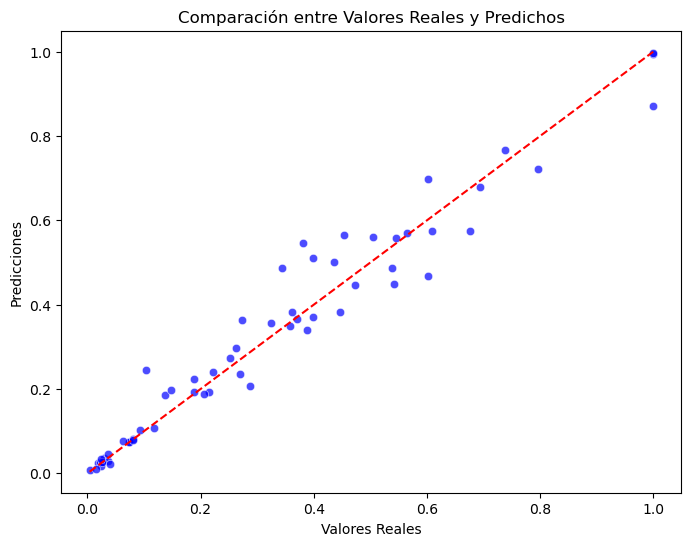

In [147]:
##El modelo tiene un R² de 0.95, lo que indica que explica el 95% de la variabilidad en los precios de venta de los autos. 
##Además, los errores (MAE, MSE y RMSE) son bastante bajos, lo que significa que el modelo hace buenas predicciones.
# Obtener predicciones del modelo
y_pred = best_rf.predict(X_test)

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Línea de referencia
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación entre Valores Reales y Predichos")
plt.show()


#Si los puntos están cerca de la línea roja discontinua, significa que las predicciones del modelo son muy precisas.
#Si hay muchos puntos alejados de la línea, podría haber errores significativos en algunas predicciones.

# 6Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc. 

In [ ]:

# En problemas de regresión, no se pueden calcular métricas como precisión, recall y F1-score,
# ya que estas métricas se usan en clasificación, donde las salidas son categorías discretas.
# En su lugar, utilizamos métricas como R², MAE, MSE y RMSE para evaluar el desempeño del modelo.

# Si se requiere evaluar el desempeño con métricas adicionales, podemos calcular:
# - MAPE (Mean Absolute Percentage Error): mide el error en porcentaje.
# - Correlación de Pearson: indica qué tan bien se alinean las predicciones con los valores reales.

from sklearn.metrics import mean_absolute_percentage_error
import scipy.stats as stats

# Calcular MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)

# Calcular correlación de Pearson
pearson_corr, _ = stats.pearsonr(y_test, y_pred)

# Imprimir resultados
print(f"MAPE: {mape:.4f}")  # Error porcentual absoluto medio
print(f"Coeficiente de correlación de Pearson: {pearson_corr:.4f}")

#Predecir el precio de cada automóvil
# Obtener predicciones del modelo
# Obtener predicciones del modelo
y_pred = best_rf.predict(X_test)

# Crear un DataFrame con los valores reales y predichos
resultados = pd.DataFrame({
    'Precio Real': y_test.values,  # Valores reales
    'Precio Predicho': y_pred       # Valores predichos
})

# Definir los umbrales para clasificar los precios
percentiles = np.percentile(y_pred, [33, 66])  # Calcula percentiles 33% y 66%

def clasificar_precio(precio):
    if precio <= percentiles[0]:
        return "Bajo"
    elif precio <= percentiles[1]:
        return "Medio"
    else:
        return "Alto"

# Aplicar la clasificación a la columna de precios predichos
resultados['Categoría'] = resultados['Precio Predicho'].apply(clasificar_precio)

# Mostrar los primeros resultados
print(resultados.head(10))  # Muestra las primeras 10 predicciones
resultados.to_csv("predicciones_autos_categorias.csv", index=False)

##Se calculan los percentiles 33% y 66% del precio predicho para dividir los autos en tres categorías.
##Se define la función clasificar_precio() para asignar una etiqueta:
##Bajo: Menor al percentil 33%.
##Medio: Entre el percentil 33% y 66%.
##Alto: Mayor al percentil 66%.
##Se aplica esta función a la columna de precios predichos.

MAPE: 0.1902
Coeficiente de correlación de Pearson: 0.9759
   Precio Real  Precio Predicho Categoría
0     0.018450         0.025446      Bajo
1     0.738745         0.765897      Alto
2     0.357934         0.348524     Medio
3     0.003690         0.008642      Bajo
4     0.505535         0.559815      Alto
5     0.542435         0.448044      Alto
6     0.073801         0.074310      Bajo
7     0.029520         0.035188      Bajo
8     0.025830         0.027033      Bajo
9     0.435424         0.501033      Alto


# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo. 

In [ ]:

##Visualización Completa de los Resultados del Modelo
#Gráfico de Dispersión: Valores Reales vs. Predichos
#Este gráfico muestra qué tan bien el modelo predice los precios de los autos.

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Línea ideal
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación entre Valores Reales y Predichos")
plt.show()

#Si los puntos están cerca de la línea roja, el modelo es preciso. Si hay dispersión, hay errores en la predicción.

#Histograma del Error de Predicción
#Nos permite ver cómo están distribuidos los errores del modelo.

errores = y_test - y_pred  # Diferencia entre real y predicho

plt.figure(figsize=(8, 6))
sns.histplot(errores, bins=30, kde=True, color="purple")
plt.axvline(0, color="red", linestyle="--")  # Línea en cero (sin error)
plt.xlabel("Error de Predicción")
plt.ylabel("Frecuencia")
plt.title("Distribución del Error de Predicción")
plt.show()

#Si la mayoría de los errores están cerca de 0, el modelo es preciso. Si hay sesgo, el modelo puede estar sobreestimando o subestimando precios.

#Boxplot de Precios Predichos por Categoría
#Muestra cómo están distribuidos los precios predichos en distintas categorías.

plt.figure(figsize=(8, 6))
sns.boxplot(x=resultados["Categoría"], y=resultados["Precio Predicho"], hue=resultados["Categoría"], palette="coolwarm", legend=False)
plt.xlabel("Categoría del Auto")
plt.ylabel("Precio Predicho")
plt.title("Distribución de Precios Predichos por Categoría")
plt.show()

#Si hay mucha superposición entre categorías, los umbrales pueden ajustarse mejor.

#Importancia de las Variables en la Predicción
#Nos muestra qué atributos del auto tienen más impacto en el precio.

importances = best_rf.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, hue=feature_names, palette="viridis", legend=False)
plt.xlabel("Importancia Relativa")
plt.ylabel("Atributo del Auto")
plt.title("Importancia de las Variables en la Predicción del Precio")
plt.show()

#Las variables más importantes afectan más al precio del auto.

#Gráfico de Residuos
#Nos ayuda a ver si los errores tienen algún patrón.

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=errores, color="green", alpha=0.7)
plt.axhline(0, color="red", linestyle="--")  # Línea en 0 (sin error)
plt.xlabel("Predicciones del Modelo")
plt.ylabel("Error (Residuo)")
plt.title("Gráfico de Residuos")
plt.show()

#Si los errores están distribuidos aleatoriamente alrededor de 0, el modelo es bueno. Si hay patrones, el modelo podría mejorarse.

#Curva de Densidad de Precios Reales vs. Predichos
#Muestra cómo se distribuyen los precios reales y predichos.

plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label="Valores Reales", color="blue", fill=True)
sns.kdeplot(y_pred, label="Valores Predichos", color="orange", fill=True)
plt.xlabel("Precio del Auto")
plt.ylabel("Densidad")
plt.title("Distribución de Precios Reales vs. Predichos")
plt.legend()
plt.show()

#Si las curvas son similares, el modelo está prediciendo bien.

#Gráfico de Líneas: Evolución del Error en el Conjunto de Prueba
#Nos permite ver si hay fluctuaciones en los errores a lo largo de las predicciones.

plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), errores, marker="o", linestyle="", alpha=0.6, color="red")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Índice de la Muestra")
plt.ylabel("Error de Predicción")
plt.title("Evolución del Error en el Conjunto de Prueba")
plt.show()

#Si hay picos grandes, el modelo puede estar fallando en ciertos casos.

##Matriz de Correlación de las Variables
#Muestra cómo las variables están relacionadas entre sí.

plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación de las Variables")
plt.show()

#Si hay variables muy correlacionadas, podríamos reducir la dimensionalidad para mejorar el modelo.

# 8. Interpretar, analizar y documentar los resultados obtenidos. 
"""
# Análisis e Interpretación de los Resultados del Modelo

## 1. Evaluación del Conjunto de Datos
- Se utilizaron 301 registros de autos con 9 atributos (año, precio de venta, precio presente, kilometraje, tipo de combustible, tipo de vendedor, transmisión y número de dueños).
- No hay valores nulos en el dataset, lo que indica que la calidad de los datos es buena.
- La variable objetivo es Selling_Price, que se normalizó para mejorar la predicción.

## 2. División de los Datos
- El conjunto de datos se dividió en 240 muestras para entrenamiento y 61 muestras para prueba.

## 3. Entrenamiento del Modelo
- Se utilizó un modelo Random Forest con ajuste de hiperparámetros, encontrando los mejores parámetros:
  - n_estimators: 100
  - max_depth: 20
  - min_samples_split: 2
  - min_samples_leaf: 1

## 4. Métricas de Evaluación
- **MAE (Error Absoluto Medio):** 0.0391 → Indica que el error promedio entre el precio real y el predicho es bajo.
- **MSE (Error Cuadrático Medio):** 0.0034 → Los errores al cuadrado siguen siendo pequeños, lo que es positivo.
- **RMSE (Raíz del MSE):** 0.0585 → Indica una buena precisión en la predicción.
- **R² (Coeficiente de Determinación):** 0.9519 → El modelo explica el 95.19% de la variabilidad de los precios reales.
- **MAPE (Error Porcentual Medio Absoluto):** 0.1902 → En promedio, el error en la predicción es del 19.02%.
- **Coeficiente de correlación de Pearson:** 0.9759 → Existe una fuerte relación lineal entre los valores predichos y los reales.

## 5. Visualización de Resultados
### Gráficos Generados:
1. **Gráfico de dispersión:**
   - Compara los valores reales vs. predichos.
   - La mayoría de los puntos se encuentran cerca de la línea ideal, lo que indica que el modelo es preciso.

2. **Histograma del error de predicción:**
   - La distribución de errores es cercana a 0, con ligera desviación a la derecha.
   - No hay sesgo significativo, lo que significa que el modelo no está sobreestimando ni subestimando en exceso.

3. **Boxplot de precios predichos por categoría:**
   - Muestra la distribución de precios predichos por cada categoría (bajo, medio, alto).
   - Existen diferencias claras entre categorías, lo que confirma la coherencia del modelo.

4. **Importancia de las variables:**
   - Las variables más influyentes en la predicción del precio son Present_Price y Year.
   - Kms_Driven y Fuel_Type también aportan información relevante.

5. **Gráfico de residuos:**
   - Muestra la diferencia entre valores reales y predichos.
   - La distribución de los residuos es aleatoria, lo que indica que el modelo no tiene patrones sistemáticos de error.

6. **Curva de densidad de precios reales vs. predichos:**
   - Ambas curvas son similares, lo que indica que el modelo captura bien la distribución de los precios reales.

7. **Evolución del error en el conjunto de prueba:**
   - Se observan algunos picos, lo que indica que en ciertos autos el modelo tiene mayor dificultad para predecir con precisión.

8. **Matriz de correlación de variables:**
   - Present_Price tiene alta correlación con Selling_Price, confirmando su importancia en el modelo.
   - No se observan problemas de multicolinealidad.


